In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
import numpy as np

In [156]:
data = pd.read_csv('E:\\ML PRACTICE\\Sales Linear Regression\\sales_data.csv')
print(data.head())

   Store_ID  Product_ID Product_Category Store_Location  Units_Sold  \
0        52        1033        Furniture       Suburban          22   
1        93        1007      Electronics          Urban          26   
2        15        1039         Clothing          Urban          21   
3        72        1082        Furniture       Suburban          16   
4        61        1041          Grocery       Suburban          21   

   Unit_Price  Discount  Advertising_Expense  Holiday_Season  Sales_Revenue  
0      376.99      0.19              5929.53               1        7604.94  
1      184.92      0.09              1803.74               0        4607.44  
2      321.02      0.11              6776.27               0        6777.04  
3      101.35      0.23              6554.24               1        2485.39  
4      377.19      0.24              5061.64               0        6052.89  


In [157]:
data.isnull().sum()

Store_ID               0
Product_ID             0
Product_Category       0
Store_Location         0
Units_Sold             0
Unit_Price             0
Discount               0
Advertising_Expense    0
Holiday_Season         0
Sales_Revenue          0
dtype: int64

In [158]:
data.describe()

,Store_ID,Product_ID,Units_Sold,Unit_Price,Discount,Advertising_Expense,Holiday_Season,Sales_Revenue
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.128000,1048.94800,19.990000,254.146370,0.148120,4943.171250,0.489000,4874.148850
std,29.573505,29.13304,4.627019,141.128179,0.087213,1582.035552,0.500129,2623.961689
min,1.000000,1000.00000,8.000000,10.460000,0.000000,-308.290000,0.000000,423.280000
25%,24.000000,1024.00000,17.000000,132.192500,0.070000,3855.737500,0.000000,2748.355000
50%,51.000000,1048.00000,20.000000,249.535000,0.150000,4943.310000,0.000000,4606.565000
75%,75.000000,1074.00000,23.000000,370.950000,0.230000,5997.625000,1.000000,6668.287500
max,100.000000,1099.00000,35.000000,499.680000,0.300000,9860.210000,1.000000,14758.070000


In [159]:
data.shape

(1000, 10)

In [160]:
data.columns

Index(['Store_ID', 'Product_ID', 'Product_Category', 'Store_Location',
       'Units_Sold', 'Unit_Price', 'Discount', 'Advertising_Expense',
       'Holiday_Season', 'Sales_Revenue'],
      dtype='object')

In [161]:
data.nunique()

Store_ID                100
Product_ID              100
Product_Category          4
Store_Location            3
Units_Sold               28
Unit_Price              989
Discount                 31
Advertising_Expense     999
Holiday_Season            2
Sales_Revenue          1000
dtype: int64

In [162]:
column = []
for x in data:
    if data[x].dtype == 'object':
        column.append(x)
        
column  

['Product_Category', 'Store_Location']

In [163]:
# To convert categorical columns into numerical using label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for x in column:
    data[x] = le.fit_transform(data[x])
    
    
    #T his line creates a dictionary that maps original category names to their corresponding numeric codes.
    le_name_mapping = dict(zip(le.classes_,le.transform(le.classes_)))
    print('feature', x) # Prints the name of the feature being processed
    print('mapping', le_name_mapping) # Prints the mapping of original categories to numeric codes

    

feature Product_Category
mapping {'Clothing': np.int64(0), 'Electronics': np.int64(1), 'Furniture': np.int64(2), 'Grocery': np.int64(3)}
feature Store_Location
mapping {'Rural': np.int64(0), 'Suburban': np.int64(1), 'Urban': np.int64(2)}


In [164]:
X = data.drop('Sales_Revenue', axis=1)
y = data['Sales_Revenue']

<Axes: >

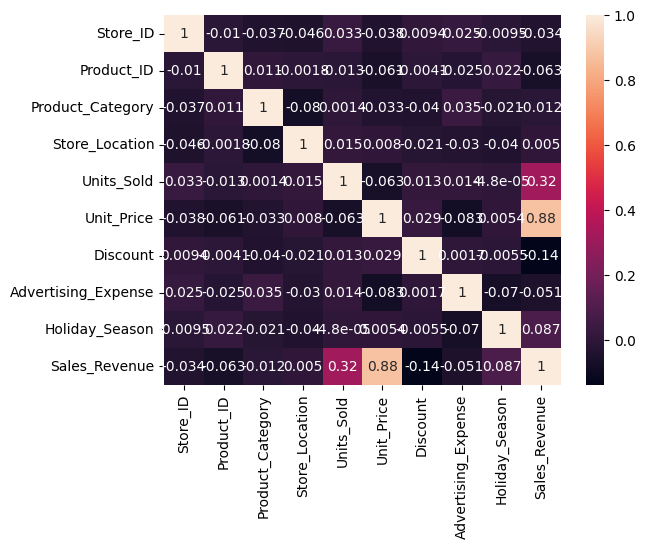

In [165]:
sns.heatmap(data.corr(),annot = True)

In [166]:
X = data[["Store_ID","Product_ID","Product_Category","Store_Location","Units_Sold","Unit_Price","Discount","Advertising_Expense","Holiday_Season"]]
y = data[["Sales_Revenue"]]

In [167]:
X

,Store_ID,Product_ID,Product_Category,Store_Location,Units_Sold,Unit_Price,Discount,Advertising_Expense,Holiday_Season
0,52,1033,2,1,22,376.99,0.19,5929.53,1
1,93,1007,1,2,26,184.92,0.09,1803.74,0
2,15,1039,0,2,21,321.02,0.11,6776.27,0
3,72,1082,2,1,16,101.35,0.23,6554.24,1
4,61,1041,3,1,21,377.19,0.24,5061.64,0
...,...,...,...,...,...,...,...,...,...
995,10,1085,1,2,29,81.84,0.23,5181.99,1
996,67,1050,2,0,23,88.24,0.14,7110.86,1
997,18,1087,1,2,25,397.14,0.13,4657.86,1
998,100,1040,1,0,10,311.98,0.00,3720.97,1


In [168]:
y

,Sales_Revenue
0,7604.94
1,4607.44
2,6777.04
3,2485.39
4,6052.89
...,...
995,2433.91
996,2501.00
997,9367.53
998,3800.98


In [169]:
X.shape

(1000, 9)

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [171]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 9)
(200, 9)
(800, 1)
(200, 1)


In [172]:
from sklearn.linear_model import LinearRegression # Importing the Linear Regression model from sklearn

In [173]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [174]:
print('Beta Values :' , model.coef_)
print('Beta Zero Values : ', model.intercept_)

Beta Values : [[-8.56799228e-01 -2.57454152e-01  1.84073940e+01 -3.11100730e+01
   2.12106607e+02  1.69363781e+01 -5.11527681e+03  3.96415772e-02
   4.28969389e+02]]
Beta Zero Values :  [-2995.44538779]


In [175]:
data.head()

,Store_ID,Product_ID,Product_Category,Store_Location,Units_Sold,Unit_Price,Discount,Advertising_Expense,Holiday_Season,Sales_Revenue
0,52,1033,2,1,22,376.99,0.19,5929.53,1,7604.94
1,93,1007,1,2,26,184.92,0.09,1803.74,0,4607.44
2,15,1039,0,2,21,321.02,0.11,6776.27,0,6777.04
3,72,1082,2,1,16,101.35,0.23,6554.24,1,2485.39
4,61,1041,3,1,21,377.19,0.24,5061.64,0,6052.89


In [176]:
y_pred = model.predict(X_test) # Predicting the target variable for the test set
y_pred

array([[ 5.14237696e+03],
       [ 6.86144750e+03],
       [ 2.18538501e+03],
       [ 6.55402335e+03],
       [ 7.63818804e+03],
       [ 2.34371964e+03],
       [ 3.79844121e+03],
       [ 6.10275481e+03],
       [ 2.75754799e+03],
       [ 1.33189100e+03],
       [ 2.47427713e+03],
       [ 5.25026533e+03],
       [ 5.36668726e+03],
       [ 5.02031486e+03],
       [ 2.60224063e+03],
       [ 6.73180859e+03],
       [-6.60223981e+02],
       [ 7.33591285e+03],
       [ 3.60685776e+03],
       [ 4.94514263e+03],
       [ 3.86811728e+03],
       [ 7.37289888e+03],
       [-3.30024317e+02],
       [ 2.46340702e+03],
       [ 7.89008884e+03],
       [ 5.51436162e+03],
       [ 3.51277957e+03],
       [ 1.49255771e+03],
       [ 2.40906861e+03],
       [ 9.55559676e+02],
       [-7.35945498e+00],
       [ 4.60743410e+02],
       [ 5.30658620e+03],
       [ 4.17037401e+03],
       [ 5.26865759e+03],
       [ 7.99412025e+03],
       [ 5.82043754e+03],
       [ 4.16945053e+03],
       [ 1.2

In [177]:
X_test['actual'] = y_test # Adding the actual values to
X_test['predicted'] = y_pred # Adding the predicted values to

X_test

,Store_ID,Product_ID,Product_Category,Store_Location,Units_Sold,Unit_Price,Discount,Advertising_Expense,Holiday_Season,actual,predicted
521,100,1072,3,2,27,171.40,0.16,6714.98,1,4611.39,5142.376959
737,31,1041,3,2,22,344.88,0.20,6185.02,1,7146.10,6861.447504
740,3,1039,1,0,15,161.64,0.22,5289.51,1,2656.80,2185.385011
660,17,1024,2,2,18,421.03,0.22,751.52,0,6285.60,6554.023352
411,42,1068,0,2,29,309.56,0.11,4428.78,0,8525.69,7638.188041
...,...,...,...,...,...,...,...,...,...,...,...
408,48,1001,1,1,23,350.54,0.14,2914.11,0,6961.93,6907.725064
332,20,1029,1,1,12,34.59,0.13,3063.44,1,760.24,-273.672779
208,59,1035,1,1,19,239.59,0.11,4135.10,0,4055.86,4363.889526
613,89,1014,0,1,15,419.83,0.12,5454.32,1,6396.79,6959.483640


In [178]:
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(y_test,y_pred)
print(rmse)

581.3321307591533


In [179]:
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']